In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [8]:
# preprocessing
from util import preprocessData, createFeatures

(ratings, reviews) = preprocessData('sportsTrain.csv')

In [38]:
# Building a dictionary
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
dic = {}
i = 0
for review in reviews:
    for word in review.split():
        w = ps.stem(word)
        dic[w] = dic.get(w, 0) + 1
    i += 1
    if i % 10000 == 0:
        print('#', end =' ') 
print(len(dic))

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 136595


In [40]:
# keeping words that occurs over 500 times
occurenceThreshold = 200
wordToIndex = {}
indexToWord = []
for key, value in dic.items():
    if value > occurenceThreshold:
        indexToWord.append(key)
        wordToIndex[key] = len(indexToWord) - 1
n = len(wordToIndex)
print(len(wordToIndex), len(indexToWord))

7754 7754


In [41]:
(ratingsVal, reviewsVal) = preprocessData('sportsDev.csv')
print(len(ratingsVal))
(Xval, yval) = createFeatures(reviewsVal, ratingsVal, wordToIndex, 10000)

284248


In [42]:
(ratingsTest, reviewsTest) = preprocessData('sportsTest.csv')
print(len(ratingsTest))
(Xtest, ytest) = createFeatures(reviewsTest, ratingsTest, wordToIndex, 10000)

284081


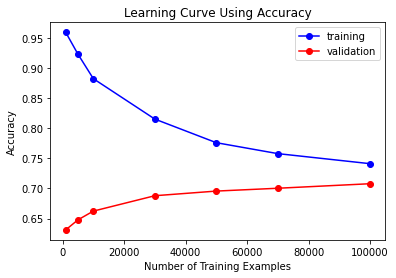

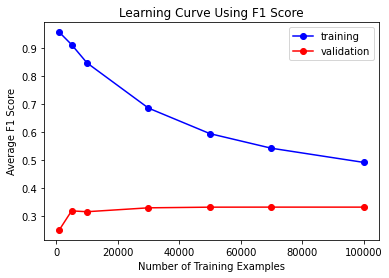

In [43]:
from sklearn.svm import LinearSVC
from util import linRegPredict, evalModel

# Plotting the learning curve
trainSizes = [1000, 5000, 10000, 30000, 50000, 70000, 100000]
#trainSizes = [100000]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for trainSize in trainSizes:
    # create feature vector and labels
    (X, y) = createFeatures(reviews, ratings, wordToIndex, trainSize)
    # train a linear model
    svmModel = LinearSVC(dual = False, max_iter=5000).fit(X, y)
    (valAcc, valF1, _) = evalModel(svmModel.predict(Xval), yval)
    (trainAcc, trainF1, _) = evalModel(svmModel.predict(X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(trainSizes, trainAccs, 'bo-', label = 'training')
plt.plot(trainSizes, valAccs, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(trainSizes, trainF1s, 'bo-', label = 'training')
plt.plot(trainSizes, valF1s, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

In [44]:
(valAcc, valF1, confM) = evalModel(svmModel.predict(Xval), yval)
print(valAcc)
print(valF1)
print(confM.astype(np.int))

0.7078
0.33343867059922705
[[ 111   16   30   17  242]
 [  44   18   34   39  217]
 [  21   18   85  104  431]
 [  14    9   62  232 1322]
 [  28   16   46  212 6632]]


In [45]:
(testAcc, testF1, confM) = evalModel(svmModel.predict(Xtest), ytest)
print(testAcc)
print(testF1)
print(confM.astype(np.int))

0.716
0.3226385250240867
[[ 104   10   19   20  261]
 [  38   15   31   32  198]
 [  26    9   75  119  445]
 [  21    5   70  204 1228]
 [  31   12   51  214 6762]]
